# Bmaze

This script generates a random maze and then employs a reinforcement learning algorithm to find a path through it. The maze is represented as a 2D array of 0s and 1s, where 0s represent paths and 1s represent walls. The reinforcement learning algorithm learns a policy to navigate the maze efficiently. The script visualizes the maze, the path found by the algorithm, and the learned policy.

In [77]:
import numpy as np
%pylab inline
from random import shuffle, randrange
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


(17, 17)


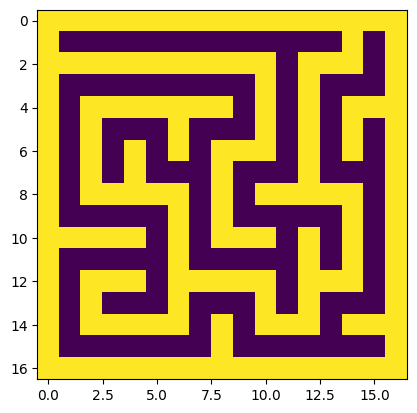

In [78]:
def make_maze(w = 16, h = 8):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(np.random.randint(w), np.random.randint(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M
 
maze=np.array(make_maze(8,8))
plt.imshow(maze)
#ylim(-0.5,16.5)
print(maze.shape)

In [79]:
maze = np.array(make_maze(8, 8))

In [91]:
def run_maze(maze, runs):
    
    policy = np.ones((17,17,4))/4.0
    # policy=np.random.random((17,17,4))
    learningrate = 0.5
    actions_list = []

    for run in range(runs):
        visited = np.zeros((17,17))
        current_x = 1
        current_y = 1
        x_move = [0, 1, 0, -1]
        y_move = [1, 0, -1, 0]
        track_x = [current_x]
        track_y = [current_y]
        visited[current_x][current_y] = 1
        actions = []

        while current_x != 15 or current_y != 15:
            # print(current_x, current_y)
            direction = np.random.choice([0, 1, 2, 3], p=policy[current_x][current_y])
            DestinationX = current_x + x_move[direction]
            Destination_y = current_y + y_move[direction]

            if maze[DestinationX][Destination_y] == 0:
                current_x = DestinationX
                current_y = Destination_y
                visited[current_x][current_y] += 1
                track_x.append(current_x)
                track_y.append(current_y)
                actions.append(direction)


        for i in range(len(actions)):
            policy[track_x[i]][track_y[i]][actions[i]]+=learningrate
        for i in range(17):
            for j in range(17):
                policy[i][j]/=policy[i][j].sum()
        actions_list.append(len(actions))


        
               
    return track_x, track_y, actions, policy

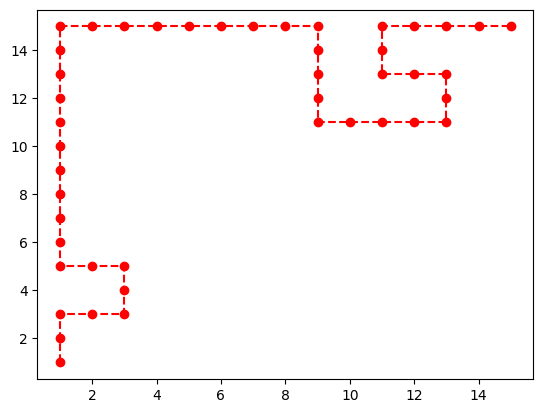

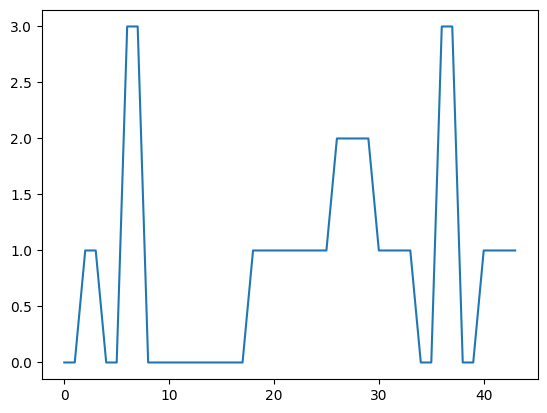

In [98]:
track_x, track_y, actions, policy = run_maze(maze,1000)
#will produce a scatter plot with red circles at the following coordinates of x nd y 
plt.plot(track_x, track_y, 'or', linestyle='dashed')

plt.figure()
plt.plot(actions)

Found path in 44 steps:


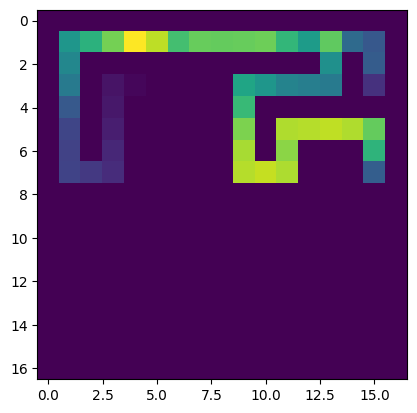

In [103]:
plt.imshow(visited)

print(f"Found path in {len(actions)} steps:")

In [ ]:
# for x, y in zip(track_x, track_y):
#     visited[x][y] = 10
# plt.imshow(visited)

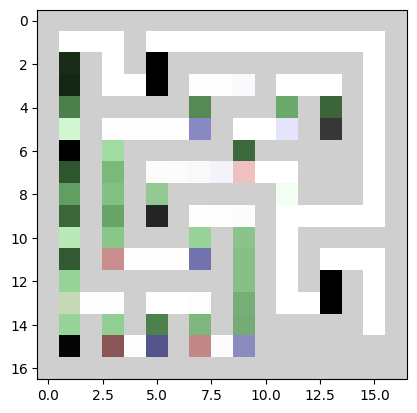

In [95]:
plt.imshow(policy, cmap='cool')




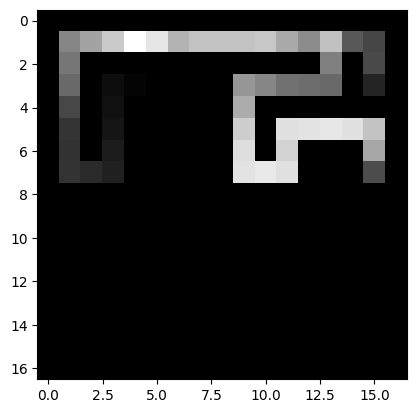

In [96]:
plt.imshow(visited, cmap='gray')

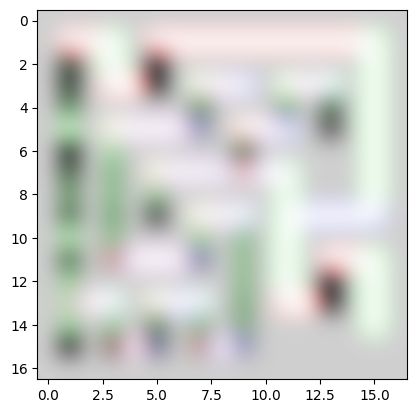

In [97]:
plt.imshow(policy, interpolation='bicubic')
